In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
data          = pd.DataFrame(boston.data)
data.columns  = boston.feature_names
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# let's standardize the data
X = data.drop('PRICE', axis=1)
y = data.PRICE
X = (X - X.mean()) / X.std()
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,8.326673e-17,3.466704e-16,-3.016965e-15,3.999875e-16,3.563575e-15,-1.149882e-14,-1.158274e-15,7.308603e-16,-1.068535e-15,6.534079e-16,-1.084420e-14,8.117354e-15,-6.494585e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


In [5]:
# fit the model
lreg = LinearRegression()
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# now let's build our predictions
data['PREDICTION'] = lreg.predict(X)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.943524


In [7]:
# now let's take a look at how the penalties are derived
data['L1_P'] = np.abs(lreg.coef_).sum()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION,L1_P
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.003843,22.101165
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.025562,22.101165
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.567597,22.101165
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.607036,22.101165
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.943524,22.101165


In [8]:
# now let's take a look at the L2 penalty
data['L2_P'] = np.power(lreg.coef_, 2).sum()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION,L1_P,L2_P
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,30.003843,22.101165,54.022223
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.025562,22.101165,54.022223
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.567597,22.101165,54.022223
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,28.607036,22.101165,54.022223
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,27.943524,22.101165,54.022223


### How Coefficients Change Over Time

In [9]:
# now let's start with Ridge Regression
from sklearn.linear_model import Ridge
rreg = Ridge()

In [10]:
# Notice that ridge comes with a parameter for alpha, which is set to 1
rreg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

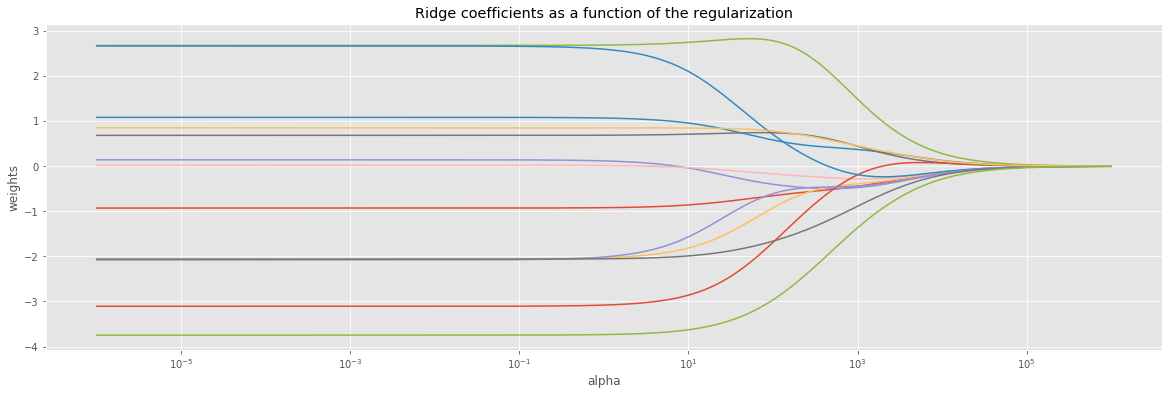

In [11]:
# now let's see how coefficients change over time
coefs = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    rreg.set_params(alpha=a)
    rreg.fit(X, y)
    coefs.append(rreg.coef_)

# Display results
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [12]:
rreg.coef_

array([-0.001798  ,  0.00166864, -0.00223928,  0.0008134 , -0.00197766,
        0.00322433, -0.00174432,  0.00115441, -0.0017657 , -0.00216887,
       -0.00235333,  0.00154435, -0.00341874])

### Optimizing Our Regularization Constant

In [13]:
# set our regularization parameter
alphas = np.logspace(-4, 4, 9)
rreg   = Ridge()
y_norm = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size=0.2, random_state=2)
ridge_scores = []
for alpha in alphas:
    scores = cross_val_score(estimator=rreg.set_params(alpha=alpha),
                             X=X_train,
                             y=y_train,
                             cv=10)
    ridge_scores.append((np.mean(scores), np.std(scores), alpha))

In [14]:
# the results of our scores
ridge_scores

[(0.7488283242337006, 0.08635888693117436, 0.0001),
 (0.7488286684698657, 0.08635878329289462, 0.001),
 (0.7488321070717429, 0.08635774820949071, 0.01),
 (0.7488661192191939, 0.08634752641778651, 0.1),
 (0.7491708542142561, 0.08625736431225997, 1.0),
 (0.7499801475602123, 0.08602802478936784, 10.0),
 (0.7274949577632901, 0.08482855091924753, 100.0),
 (0.5418123896405184, 0.06509196834564213, 1000.0),
 (0.15595984584074535, 0.02909726107226396, 10000.0)]

In [15]:
# the regularization parameter that gives the highest score
max(ridge_scores)

(0.7499801475602123, 0.08602802478936784, 10.0)

In [16]:
# We'll now set the alpha value of our Ridge algorithm to 10
rreg.set_params(alpha=10)
rreg.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [17]:
# and the final score on our test set
rreg.score(X_test, y_test)

0.8152797666431434

In [18]:
# now do the same for lasso regression
from sklearn.linear_model import Lasso
la_reg = Lasso()
la_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [19]:
# set our regularization parameter for Lasso
alphas = np.logspace(-4, 4, 9)
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size=0.2, random_state=2)
lasso_scores = []
for alpha in alphas:
    scores = cross_val_score(estimator=la_reg.set_params(alpha=alpha),
                             X=X_train,
                             y=y_train,
                             cv=10)
    lasso_scores.append((np.mean(scores), np.std(scores), alpha))

In [20]:
# our results -- notice the steep descent in accuracy
lasso_scores

[(0.7489598793184726, 0.08623503449300811, 0.0001),
 (0.7498712923987743, 0.08534355874148068, 0.001),
 (0.7330254598830619, 0.0890786997858119, 0.01),
 (0.5666236927575207, 0.05747694840098716, 0.1),
 (-0.01960449224867362, 0.015125888580180534, 1.0),
 (-0.01960449224867362, 0.015125888580180534, 10.0),
 (-0.01960449224867362, 0.015125888580180534, 100.0),
 (-0.01960449224867362, 0.015125888580180534, 1000.0),
 (-0.01960449224867362, 0.015125888580180534, 10000.0)]

In [21]:
# the value that returns the highest score
max(lasso_scores)

(0.7498712923987743, 0.08534355874148068, 0.001)

In [22]:
# now we'll fit Lasso with the new value of alpha
la_reg.set_params(alpha=0.001).fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
# and score it on our test set
la_reg.score(X_test, y_test)

0.8148235745783066

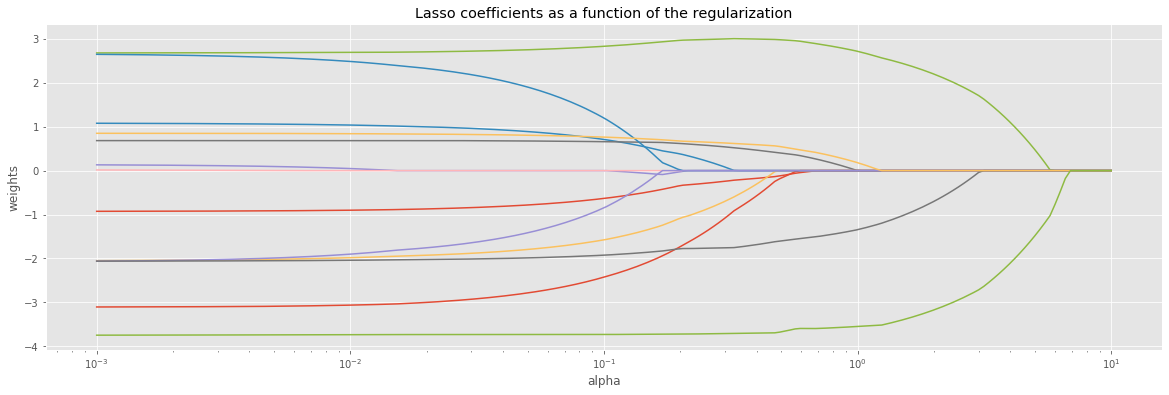

In [25]:
# now let's see how coefficients change over time
coefs = []

alphas = np.logspace(-3, 1, 200)

# Train the model with different regularisation strengths
for a in alphas:
    la_reg.set_params(alpha=a)
    la_reg.fit(X, y)
    coefs.append(la_reg.coef_)

# Display results
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()